### Nom et Prénoms : SOSSOU Didi Orlog
### Parcours :  IA Big Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import warnings
from scipy.linalg import norm
sp.init_printing()
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

### Definition de fonctions pour éviter la redondance

In [3]:
def compute_meshgrid(x_range=(-1.25,1.5), y_range=(-1.25,1.5), resolution=200):
    teta1 = np.linspace(*x_range, resolution)
    teta2 = np.linspace(*y_range, resolution)
    X, Y = np.meshgrid(teta1, teta2)
    return teta1, teta2, X, Y

def compute_function_values(X, Y, func):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func([X[i, j], Y[i, j]])
    return Z

def plot_contour(X, Y, Z, title, xlabel="teta1", ylabel="teta2", trajectory=None, points=None, points_labels=None):
    plt.figure(figsize=(10,8))
    levels=np.concatenate((np.array([0,1]),np.arange(5,45,5)))
    CS = plt.contour(X, Y, Z, levels=levels, cmap="RdBu")
    plt.clabel(CS, inline=True, fontsize=10)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar(CS)
    if trajectory is not None:
        # Si la trajectoire est au format 2 x n_points, la transposer.
        if trajectory.shape[0] == 2 and trajectory.shape[1] > 2:
            trajectory = trajectory.T
        n = trajectory.shape[0]
        cmap = plt.get_cmap("viridis")
        for i in range(n - 1):
            color = cmap(i/(n-1))
            plt.plot(trajectory[i:i+2, 0], trajectory[i:i+2, 1], color=color, marker='o')
            dx = trajectory[i+1, 0] - trajectory[i, 0]
            dy = trajectory[i+1, 1] - trajectory[i, 1]
            plt.arrow(trajectory[i, 0], trajectory[i, 1], dx, dy, color=color, head_width=0.05, head_length=0.1, length_includes_head=True)
    if points is not None:
        #points is a list of a tuble containing a the points and a dict for style
        for point, style in points:
                plt.plot(point[0], point[1], **style)
    if points_labels is not None:
        for point, label in points_labels:
            plt.annotate(label, xy=point, xytext=(point[0]+0.05, point[1]+0.05), textcoords='data', fontsize=16)
    plt.show()

def plot_3d_surface(X, Y, Z, title, xlabel="teta1", ylabel="teta2", zlabel="f(teta)"):
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.contour(X, Y, Z, levels=30, zdir='z', offset=np.min(Z), cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    fig.colorbar(surface, ax=ax, shrink=0.7)
    plt.show()

## Calculs symboliques sur la fonction

## 1. Détermination du point stationnaire $\theta^{*}$

La fonction donnée est :

$$
J(\theta) = (1 - \theta_1)^2 + 100(\theta_2 - \theta_1^2)^2
$$

### 1.1 Calcul du gradient $\nabla_{\theta} J(\theta)$

Le gradient est :

$$
\nabla_{\theta} J(\theta) =
\begin{bmatrix}
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2}
\end{bmatrix}
$$

#### Dérivée partielle par rapport à $\theta_1$ :

$$
\frac{\partial J}{\partial \theta_1} = \frac{\partial}{\partial \theta_1} \left( (1 - \theta_1)^2 + 100(\theta_2 - \theta_1^2)^2 \right)
$$


Pour le terme $(1 - \theta_1)^2$, la dérivée par rapport à $\theta_1$ est :

$$
\frac{\partial}{\partial \theta_1} \left( (1 - \theta_1)^2 \right) = 2(1 - \theta_1)(-1) = -2(1 - \theta_1)
$$

Pour le terme $100(\theta_2 - \theta_1^2)^2$ :

$$
\frac{\partial}{\partial \theta_1} \left( 100(\theta_2 - \theta_1^2)^2 \right) = 100 \cdot 2(\theta_2 - \theta_1^2) \cdot (-2\theta_1) = -400\theta_1 (\theta_2 - \theta_1^2)
$$

Ainsi, la dérivée  partielle de  J par rapport à $\theta_1$ est :

$$
\frac{\partial J}{\partial \theta_1} = -2(1 - \theta_1) - 400\theta_1 (\theta_2 - \theta_1^2)
$$

#### Dérivée partielle par rapport à $\theta_2$ :

$$
\frac{\partial J}{\partial \theta_2} = \frac{\partial}{\partial \theta_2} \left( (1 - \theta_1)^2 + 100(\theta_2 - \theta_1^2)^2 \right)
$$

Le premier terme ne dépend pas de $\theta_2$, donc sa dérivée est 0. Le second terme donne :

$$
\frac{\partial}{\partial \theta_2} \left( 100(\theta_2 - \theta_1^2)^2 \right) = 100 \cdot 2(\theta_2 - \theta_1^2) = 200(\theta_2 - \theta_1^2)
$$

Ainsi, la dérivée partielle de J par rapport à $\theta_2$ est :

$$
\frac{\partial J}{\partial \theta_2} = 200(\theta_2 - \theta_1^2)
$$

Ainsi, le gradient est :

$$
\nabla_{\theta} J(\theta) =
\begin{bmatrix}
-2(1 - \theta_1) - 400\theta_1 (\theta_2 - \theta_1^2) \\
200(\theta_2 - \theta_1^2)
\end{bmatrix}
$$

---

### 1.2 Résolution de $\nabla_{\theta} J(\theta) = 0$

On résout le système d'équations :

1. $-2(1 - \theta_1) - 400\theta_1 (\theta_2 - \theta_1^2) = 0$
2. $200(\theta_2 - \theta_1^2) = 0$

De la deuxième équation :

$$
\theta_2 = \theta_1^2
$$

En substituant dans la première équation :

$$
-2(1 - \theta_1) - 400\theta_1 (\theta_1^2 - \theta_1^2) = 0
$$

$$
-2(1 - \theta_1) = 0
$$

$$
\theta_1 = 1
$$

Donc, $\theta_2 = 1^2 = 1$.

Le **point stationnaire** est donc :

$$
\theta^* =
\begin{bmatrix}
1 \\
1
\end{bmatrix}
$$

---

## 2. Vérification que $\theta^{*}$ est un minimum

### 2.1 Calcul de la matrice hessienne $H(\theta)$

La hessienne est définie par :

$$
H(\theta) =
\begin{bmatrix}
\frac{\partial^2 J}{\partial \theta_1^2} & \frac{\partial^2 J}{\partial \theta_1 \partial \theta_2} \\
\frac{\partial^2 J}{\partial \theta_2 \partial \theta_1} & \frac{\partial^2 J}{\partial \theta_2^2}
\end{bmatrix}
$$

#### Calcul des dérivées secondes :


$$
\frac{\partial^2 J}{\partial \theta_1^2} = \frac{\partial}{\partial \theta_1} \left( -2(1 - \theta_1) - 400\theta_1 (\theta_2 - \theta_1^2) \right)
$$

$$
= 2 - 400(\theta_2 - \theta_1^2) - 400\theta_1(-2\theta_1)
$$

$$
= 2 - 400(\theta_2 - \theta_1^2) + 800\theta_1^2
$$

En évaluant en $\theta^* = [1, 1]$ :

$$
H_{11} = 2 - 400(1 - 1) + 800(1)^2 = 2 + 800 = 802
$$


$$
\frac{\partial^2 J}{\partial \theta_1 \partial \theta_2} = \frac{\partial}{\partial \theta_2} \left( -400\theta_1 (\theta_2 - \theta_1^2) \right)
$$

$$
= -400\theta_1
$$

En évaluant en $\theta^* = [1, 1]$ :

$$
H_{12} = -400(1) = -400
$$


$$
\frac{\partial^2 J}{\partial \theta_2^2} = 200
$$

Ainsi, la matrice hessienne est :

$$
H(\theta^*) =
\begin{bmatrix}
802 & -400 \\
-400 & 200
\end{bmatrix}
$$

### 2.2 Vérification de la positivité définie

Le déterminant de $H(\theta^*)$ est :

$$
\det(H) = (802 \times 200) - (-400 \times -400)
$$

$$
= 160400 - 160000 = 400
$$

Comme $\det(H) > 0$ et que $H_{11} = 802 > 0$, la matrice est **définie positive**.

Cela signifie que $J(\theta)$ est convexe en $\theta^*$, donc $\theta^*$ est bien un **minimum global**.

In [22]:
# Definition symbolique de la fonction
theta1, theta2 = sp.symbols("theta1 theta2")
J_symbolic = (1 - theta1) ** 2 + 100 * (theta2 - theta1 ** 2) ** 2

# Calcul symbolique du gradient et de la hessienne
gradient_symbolic = [sp.simplify(sp.diff(J_symbolic, var)) for var in (theta1, theta2)]
hessian = sp.simplify(sp.hessian(J_symbolic, (theta1, theta2)))
# Resolution de gradient = 0
critical_points = sp.solve(gradient_symbolic, (theta1, theta2))

print(f"Gradient : {gradient_symbolic}")
print(f"Hessienne : {hessian}")
print(f"Point critique : {critical_points}")

# Injection du point critique (1, 1) dans la hessienne
hessian_numeric = hessian.subs({theta1: 1, theta2: 1})
print(f"Hessienne au point critique (1, 1) : {hessian_numeric}")

# Diagonalisation et vérifions si la hessienne est définie positive
p, d = hessian_numeric.diagonalize()

print(hessian_numeric.eigenvals())
print(f"Hessienne diagonalisée: {d}")
print("Elle est definie positive")

Gradient : [400*theta1*(theta1**2 - theta2) + 2*theta1 - 2, -200*theta1**2 + 200*theta2]
Hessienne : Matrix([[1200*theta1**2 - 400*theta2 + 2, -400*theta1], [-400*theta1, 200]])
Point critique : [(1, 1)]
Hessienne au point critique (1, 1) : Matrix([[802, -400], [-400, 200]])
{501 - sqrt(250601): 1, sqrt(250601) + 501: 1}
Hessienne diagonalisée: Matrix([[501 - sqrt(250601), 0], [0, sqrt(250601) + 501]])
Elle est definie positive


## Recherche numérique de la solution

In [5]:
# Fonction critère
mycriterion = lambda theta: (1 - theta[0]) ** 2 + 100 * (theta[1] - theta[0] ** 2) ** 2

# Fonction gradient
mygradient = lambda theta: np.array([
    -400 * theta[0] * (-theta[0] ** 2 + theta[1]) + 2 * theta[0] - 2,
    -200 * theta[0] ** 2 + 200 * theta[1],
])
mygradient (np.array([1, 1]) )

array([0, 0])

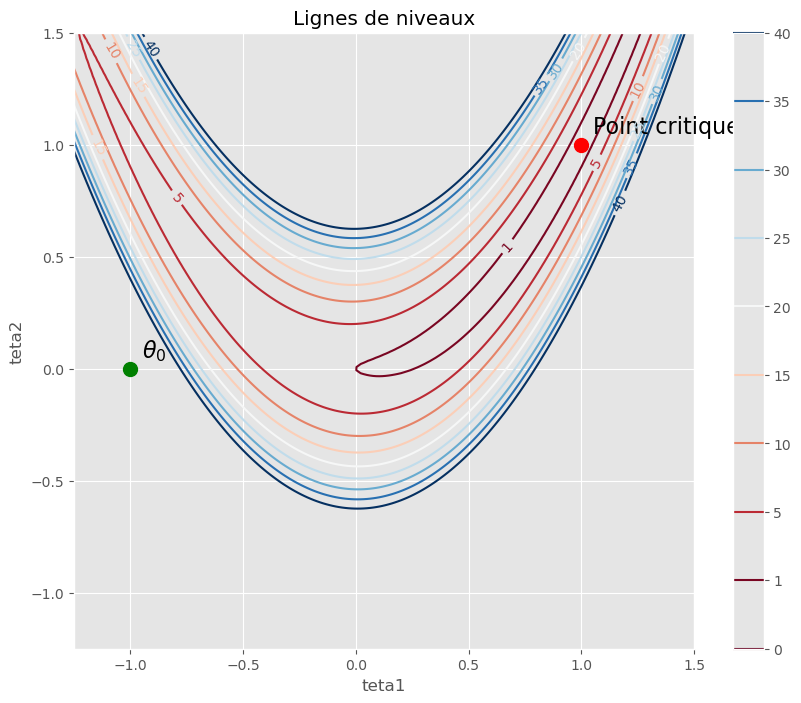

In [6]:
teta1, teta2, X, Y = compute_meshgrid()
Z = compute_function_values(X, Y, mycriterion)
points = [(critical_points[0], {"marker": "o", "color": "red", "markersize": 10, "linestyle": ""}), (np.array([-1.0, 0.0]), {"marker": "o", "color": "green", "markersize": 10, "linestyle": ""})]
"""    if points_labels is not None:
        for point, label in points_labels:
            plt.annotate(label, xy=point, xytext=(point[0]+0.05, point[1]+0.05), textcoords='data')"""

points_labels = [(critical_points[0], "Point critique"), (np.array([-1.0, 0.0]), r"${\theta}_0$")]
plot_contour(teta1, teta2, Z, "Lignes de niveaux", points=points, points_labels=points_labels)

## Descente de gradient

In [7]:
def gradient_descent(theta0, mycriterion, mygradient, iter_max=50, thresh=1e-3):
    history_J = np.empty(iter_max)
    history_theta = np.empty((theta0.shape[0], iter_max))
    iter = 0
    theta = theta0.copy()

    history_theta[:, iter] = theta0
    history_J[iter] = mycriterion(theta0)
    grad = mygradient(theta0)

    while (iter <= iter_max - 2) and (norm(grad) > thresh):
        direction = -grad  # direction of descent
        alpha = 1
        # Simple line search to select step size alpha
        while mycriterion(theta + alpha * direction) > mycriterion(theta) + 0.1 * alpha * np.dot(grad, direction):
            alpha *= 0.5
        theta += alpha * direction
        iter += 1
        history_theta[:, iter] = theta
        history_J[iter] = mycriterion(theta)
        grad = mygradient(theta)

    return theta, history_J[:iter + 1], history_theta[:, :iter + 1]

In [8]:
theta0 = np.array([-1.0, 0.0])
theta, history_J, history_theta = gradient_descent(theta0, mycriterion, mygradient, iter_max=1000)
print(f"Solution trouvée : theta = {theta}, valeur de la fonction J = {history_J[-1]}")

Solution trouvée : theta = [0.94178376 0.88701633], valeur de la fonction J = 0.0033894866014065553


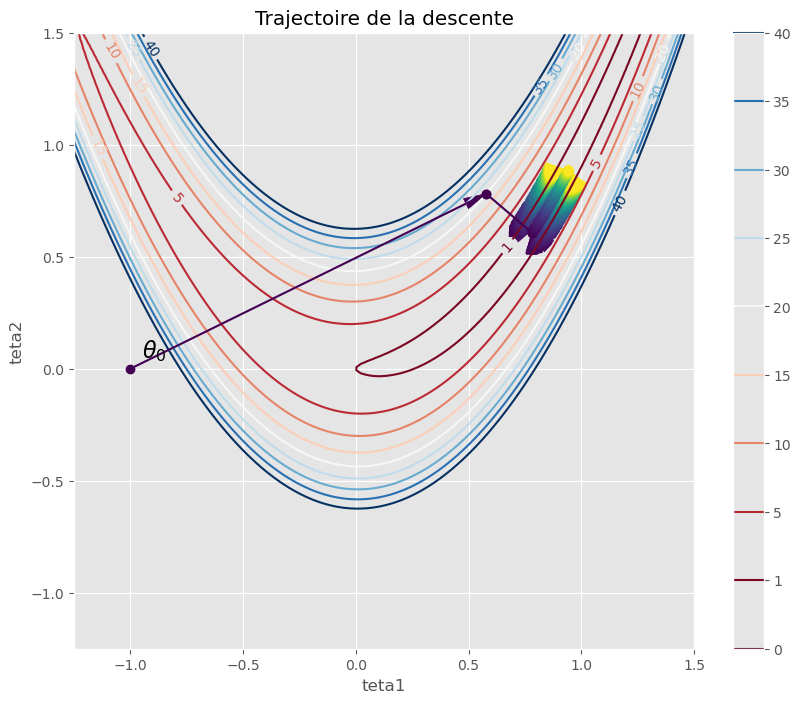

In [9]:
points_labels = [(theta0, r"${\theta}_0$")]
plot_contour(teta1, teta2, Z, "Trajectoire de la descente", trajectory=history_theta, points_labels=points_labels)

### La convergence est tres lente et les resultats ne sont pas tres precis

## Methode de newton

In [10]:
def myhessian(theta):
    H = np.array([
        [1200 * theta[0]**2 - 400 * theta[1] + 2, -400 * theta[0]],
        [-400 * theta[0], 200]
    ])
    return H

def newton_method(theta0, iter_max=50, thresh=1e-2, lambd=1e-3):
    theta = theta0.copy()
    history_theta = np.empty((theta0.shape[0], iter_max))
    history_J = np.empty(iter_max)
    iter = 0

    history_theta[:, iter] = theta
    history_J[iter] = mycriterion(theta)
    grad = mygradient(theta)

    while (iter <= iter_max - 2) and (norm(grad) > thresh):
        H = myhessian(theta)
        # Regularisation
        H += lambd * np.eye(H.shape[0])
        try:
            H_inv = np.linalg.inv(H)
        except np.linalg.LinAlgError:
            print("La hessienne n' est pas inversible")
            break

        direction = -H_inv @ grad
        alpha = 1.0
        # Armijo
        while mycriterion(theta + alpha * direction) > mycriterion(theta) + 0.1 * alpha * np.dot(grad, direction):
            alpha *= 0.5

        theta += alpha * direction
        iter += 1
        history_theta[:, iter] = theta
        history_J[iter] = mycriterion(theta)
        grad = mygradient(theta)

    return theta, history_J[:iter + 1], history_theta[:, :iter + 1]

In [11]:
theta0 = np.array([-1.0, 0.0])
theta, history_J, history_theta = newton_method(theta0)

print(f"Solution trouvée : theta = {theta}, valeur de la fonction J = {history_J[-1]}")

Solution trouvée : theta = [0.99815588 0.99630943], valeur de la fonction J = 3.4040604051066355e-06


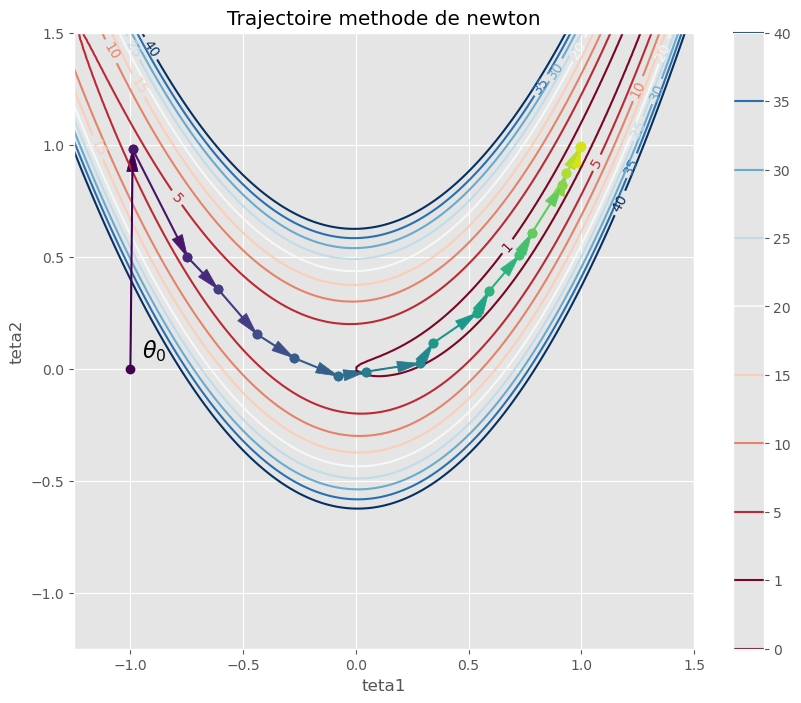

In [12]:
points_labels = [(theta0, r"${\theta}_0$")]
plot_contour(teta1, teta2, Z, "Trajectoire methode de newton", trajectory=history_theta,points_labels=points_labels)